# Univariate Analyses with Nilearn

## Setup

### Import packages

In [40]:
import glob
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns

from nilearn.glm.first_level import FirstLevelModel

### Define study specific parameters

In [5]:
subj = 'sub-10159'
task = 'stopsignal'

# Define fmriprep template space
template = 'MNI152NLin2009cAsym'

tr = 2  # repetition time is 2 seconds


### Set directories

In [7]:
# Set BIDS project directory
#bids_dir = '/data/neuron/SCN/SR/'
#os.chdir(bids_dir)

# Set output directory
outp_dir = bids_dir + 'derivatives/SR_first_level/'+subj+'/'

### Using openneuro BIDS data

In [2]:
from nilearn.datasets import (
    fetch_ds000030_urls,
    fetch_openneuro_dataset,
    select_from_index,
)

_, urls = fetch_ds000030_urls(data_dir='/Users/hpopal/Desktop/nilearn/')

exclusion_patterns = [
    "*group*",
    "*phenotype*",
    "*mriqc*",
    "*parameter_plots*",
    "*physio_plots*",
    "*space-fsaverage*",
    "*space-T1w*",
    "*dwi*",
    "*beh*",
    "*task-bart*",
    "*task-rest*",
    "*task-scap*",
    "*task-task*",
]
urls = select_from_index(
    urls, exclusion_filters=exclusion_patterns, n_subjects=2
)

bids_dir, _ = fetch_openneuro_dataset(urls=urls)

os.chdir(bids_dir)

# Set output directory
outp_dir = bids_dir + 'derivatives/SR_first_level/'+subj+'/'

 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 69148672 of 102374780 bytes (67.5%,    0.5s remaining) ...done. (2 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 109953024 of 120927302 bytes (90.9%,    0.2s remaining) ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 76193792 of 102374780 bytes (74.4%,    0.3s remaining) ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 77398016 of 119658723 bytes (64.7%,    0.5s remaining) ...done. (2 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 31055872 of 40343879 bytes (77.0%,    0.3s remaining) ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


NameError: name 'subj' is not defined

# Single Subject Analysis

In [8]:
# Make participant-specific directory for output if it doesn't exist
if not os.path.exists(outp_dir):
    os.makedirs(outp_dir)

In [70]:
from nilearn.glm.first_level import first_level_from_bids


(
    models,
    models_run_imgs,
    models_events,
    models_confounds,
) = first_level_from_bids(
    dataset_path=bids_dir,
    task_label=task,
    space_label=template,
    smoothing_fwhm=5.0,
    derivatives_folder=bids_dir+'/derivatives/fmriprep',
    n_jobs=2,
)

In [61]:
# Find all of the preprocessed functional runs
models_run_imgs = [f for f in glob.glob(bids_dir + '/derivatives/fmriprep/'+subj+'/func/'+subj+'_task-'+task+'*space-'+template+'_desc-preproc_bold.nii.gz', recursive=True)]
models_run_imgs.sort()
print('Number of functional runs for '+subj+': '+str(len(models_run_imgs)))

Number of functional runs for sub-10159: 1


In [71]:
models_events

[[          onset  duration trial_type PresentedStimulusArrowDirection  \
  0      0.006134     1.500         GO                            LEFT   
  1      0.000000     2.250        NaN                     BLANKSCREEN   
  2      3.762595     1.500         GO                           RIGHT   
  3      0.000000     0.750        NaN                     BLANKSCREEN   
  4      6.013056     1.500         GO                            LEFT   
  ..          ...       ...        ...                             ...   
  251    0.000000     0.500        NaN                     BLANKSCREEN   
  252  347.888159     1.500         GO                            LEFT   
  253    0.000000     1.500        NaN                     BLANKSCREEN   
  254  350.883213     1.500         GO                           RIGHT   
  255    0.000000     0.625        NaN                     BLANKSCREEN   
  
       ReactionTime SubjectResponseButton  SubjectResponseButtonCode  \
  0        0.416274                  

In [62]:
models_run_imgs

['/Users/hpopal/nilearn_data/ds000030/ds000030_R1.0.4/uncompressed/derivatives/fmriprep/sub-10159/func/sub-10159_task-stopsignal_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

In [67]:
# Grab subject's T1 as a mask to keep analysis in subject space
subj_t1 = bids_dir+'/derivatives/fmriprep/'+subj+'/anat/'+subj+'_space-'+template+'_desc-brain_mask.nii.gz'


# Set path to subject specific fmriprep output
fmri_run_data_dir = bids_dir+'/derivatives/fmriprep/'+subj+'/func/'

# Set motion parameters to regress out
#motion_reg_names = ['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z']
#confounds = []
#events = []

# Set the relevant conditions (not contrasts)
relv_conds = ['Go','StopSuccess']

## Create Design Matrix

### Import motion regressors

<Axes: >

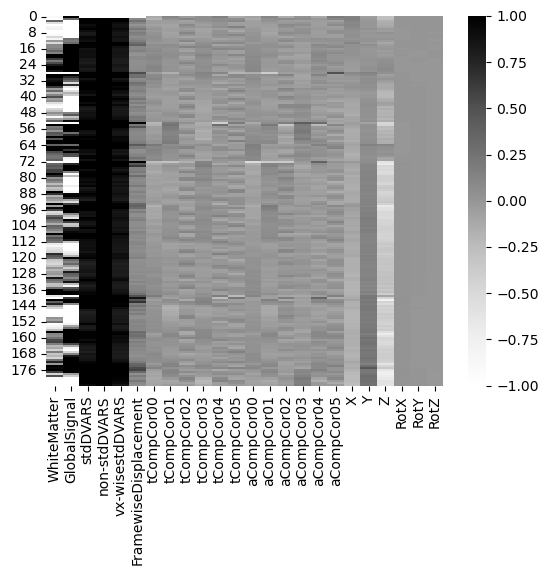

In [60]:
# Set motion parameters and input as a dataframe
models_confounds = pd.read_csv(fmri_run_data_dir+subj+'_task-'+task+'_desc-confounds_regressors.tsv', sep='\t')
    
# Filter for just the motion regressors specified above and add to a 
# general confounds list
#confounds.append(motion_reg[motion_reg_names])
sns.heatmap(models_confounds, cmap='Greys', vmin=-1, vmax=1)

### Import the events file

In [54]:
#temp_event_file = pd.read_csv(event_files[n])
#temp_event_file = temp_event_file[temp_event_file['trial_type'].str.contains('fixation') == False]
#events.append(temp_event_file)

# Find the task event files that are ready to become design matrices
event_files = [f for f in glob.glob(os.path.join(bids_dir, subj, 'func', 
                                                subj+'_task-'+task+'*_events.tsv') , recursive=True)]
event_files.sort()

models_events = pd.read_csv(event_files[0], sep='\t')
models_events

,onset,duration,trial_type,PresentedStimulusArrowDirection,ReactionTime,SubjectResponseButton,SubjectResponseButtonCode,SubjectResponseCorrectness,TrialOutcome,StopSignalDelay,LadderNumber,LadderTime,LadderMovement,TimeCourse,onset_noTriggerAdjust,TimeCourse_noTriggerAdjust
0,0.006134,1.500,GO,LEFT,0.416274,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,0.000,0.006134,0.000
1,0.000000,2.250,NaN,BLANKSCREEN,0.000000,NaN,0,NaN,NaN,0.0,0,0,0,1.500,0.000000,1.500
2,3.762595,1.500,GO,RIGHT,0.395370,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,3.750,3.762595,3.750
3,0.000000,0.750,NaN,BLANKSCREEN,0.000000,NaN,0,NaN,NaN,0.0,0,0,0,5.250,0.000000,5.250
4,6.013056,1.500,GO,LEFT,0.397906,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,6.000,6.013056,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.500,NaN,BLANKSCREEN,0.000000,NaN,0,NaN,NaN,0.0,0,0,0,347.375,0.000000,347.375
252,347.888159,1.500,GO,LEFT,0.515824,LEFT,5,CorrectResponse,SuccessfulGo,0.0,0,0,0,347.875,347.888159,347.875
253,0.000000,1.500,NaN,BLANKSCREEN,0.000000,NaN,0,NaN,NaN,0.0,0,0,0,349.375,0.000000,349.375
254,350.883213,1.500,GO,RIGHT,0.383631,RIGHT,28,CorrectResponse,SuccessfulGo,0.0,0,0,0,350.875,350.883213,350.875


## First level analysis for a single subject

### Set the first level model parameters

In [68]:
fmri_glm = FirstLevelModel(t_r=tr,
                            mask_img=subj_t1,
                            #slice_time_ref=0.5,  # Check to see how your data was preprocessed
                            noise_model='ar1',
                            standardize=False,
                            hrf_model='spm',
                            drift_model='polynomial')

### Conduct the GLM using the functional data, event file, and the confounds

In [72]:
# Conduct the GLM using the functional data, event file, and the confounds
fmri_glm = fmri_glm.fit(models_run_imgs, models_events, models_confounds)

TypeError: expected str, bytes or os.PathLike object, not list

### Contrasts
Set contrasts for each condition, to make a beta map for each condition. This loop sets a column of 1s for each condition separately, so that each condition can be examined separately 

In [ ]:
contrasts = {}
for cond in relv_conds:
    contrasts[cond] = np.zeros(n_conds)
    cond_idx = [design_matrix.columns.to_list().index(cond)]
    contrasts[cond][cond_idx] = 1

In [ ]:
# Create z-scored beta maps contrasts
for n_cont in range(len(contrasts)):
    cont_name = list(contrasts.keys())[n_cont]
    z_map = fmri_glm.compute_contrast(contrasts[cont_name], output_type='z_score')
    
    z_map.to_filename(os.path.join(outp_dir,'zmap_'+task+'_'+cont_name+'_run-'+str(n+1)+'.nii.gz'))
    

## Loop through all functional runs

In [ ]:
design_matrices = []
for n in range(len(func_runs)):
    # Set motion parameters and input as a dataframe
    motion_reg = pd.read_csv(fmri_run_data_dir+subj+'_task-'+task+'_run-'+str(n+1)+'_desc-confounds_timeseries.tsv', sep='\t')
    
    # Filter for just the motion regressors specified above and add to a 
    # general confounds list
    confounds.append(motion_reg[motion_reg_names])

    # Import the event file as a dataframe                 
    temp_event_file = pd.read_csv(event_files[n])
    temp_event_file = temp_event_file[temp_event_file['trial_type'].str.contains('fixation') == False]
    events.append(temp_event_file)
    
    # Set the first level model parameters
    fmri_glm = FirstLevelModel(t_r=tr,
                               mask_img=subj_t1,
                               slice_time_ref=0.5,
                               noise_model='ar1',
                               standardize=False,
                               hrf_model='spm',
                               drift_model='polynomial',
                               high_pass=0.01)

    # Conduct the GLM using the functional data, event file, and the confounds
    fmri_glm = fmri_glm.fit(func_runs[n], events[n], confounds[n])

    # Specify the design matrix to pull conditions and contrasts later
    design_matrix = fmri_glm.design_matrices_[0]
    
    # Find the total number of conditions in the design matrix
    n_conds = len(design_matrix.columns)


    # Set contrasts for each condition, to make a beta map for each condition
    # This loop sets a column of 1s for each condition separately, so that
    # each condition can be examined separately 
    contrasts = {}
    for cond in relv_conds:
        contrasts[cond] = np.zeros(n_conds)
        cond_idx = [design_matrix.columns.to_list().index(cond)]
        contrasts[cond][cond_idx] = 1


    # Create z-scored beta maps contrasts
    for n_cont in range(len(contrasts)):
        cont_name = list(contrasts.keys())[n_cont]
        z_map = fmri_glm.compute_contrast(contrasts[cont_name], output_type='z_score')
    
        z_map.to_filename(os.path.join(outp_dir,'zmap_'+task+'_'+cont_name+'_run-'+str(n+1)+'.nii.gz'))
    
    # Export design matrix image
    
    
    # Save design matrix for between run analysis
    design_matrices.append(design_matrix)

## Compute contrasts across all runs

In [ ]:
fmri_glm = FirstLevelModel(t_r=tr,
                           mask_img=subj_t1,
                           slice_time_ref=0.5,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model='polynomial',
                           high_pass=0.01)

fmri_glm = fmri_glm.fit(func_runs, design_matrices=design_matrices)

for n_cont in range(len(contrasts)):
    cont_name = list(contrasts.keys())[n_cont]
    z_map = fmri_glm.compute_contrast(contrasts[cont_name], output_type='z_score')

    z_map.to_filename(os.path.join(outp_dir,'zmap_'+task+'_'+cont_name+'_run-all.nii.gz'))
    

## Create Specific Contrasts

In [ ]:
# Create a list of conditions that will be tested against each other
# The index of each list will be the contrast (e.g. cond_a_list[0] > cond_b_list[0])
cond_a_list = ['HighReward_SimPeer-fb', 'HighReward_SimPeer-fb', 'HighReward_SimPeer', 'HighReward_SimPeer']
cond_b_list = ['HighReward_DisPeer-fb', 'HighReward_Computer-fb', 'HighReward_DisPeer', 'HighReward_Computer']
contrasts_df = pd.DataFrame(list(zip(cond_a_list, cond_b_list)), 
                            columns=['cond_a','cond_b'])

In [ ]:
# Create a dictionary that will store the contrast arrays
contrasts_bw_conds = {}

dm_cols = list(design_matrices[0].columns)

In [ ]:
# Loop through and fill in 1s and 0s for contrasts
for n in range(len(contrasts_df)):
    # Find the condition names to be contrasted
    cond_a = contrasts_df.loc[n,'cond_a']
    cond_b = contrasts_df.loc[n,'cond_b']
    
    # Create an array of zeros
    contrasts_bw_conds[cond_a+'_V_'+cond_b] = np.zeros(len(dm_cols))
    
    # Find the index of each condtion as defined before
    temp_idx_a = dm_cols.index(cond_a)
    temp_idx_b = dm_cols.index(cond_b)
    
    # Fill the exact condition index in the contrast array with a 1 or -1
    contrasts_bw_conds[cond_a+'_V_'+cond_b][temp_idx_a] = 1
    contrasts_bw_conds[cond_a+'_V_'+cond_b][temp_idx_b] = -1

In [ ]:
# Create contrast maps
for n_cont in range(len(contrasts_bw_conds)):
    cont_name = list(contrasts_bw_conds.keys())[n_cont]
    z_map = fmri_glm.compute_contrast(contrasts_bw_conds[cont_name], output_type='z_score')

    z_map.to_filename(os.path.join(outp_dir,'zmap_'+task+'_'+cont_name+'_run-all.nii.gz'))



***
# Second Level Analysis